<a href="https://colab.research.google.com/github/rajdas2001/Time-Series-Analysis-using-Prophet/blob/main/Time_Series_Analysis_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [2]:
import pandas as pd

df = pd.read_csv('dc.csv')

df = df.rename(columns = {'Unnamed: 0' : 'Time'})
df['Time'] = pd.to_datetime(df['Time'])
df = df.iloc[::-1].set_index('Time')

df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Time,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


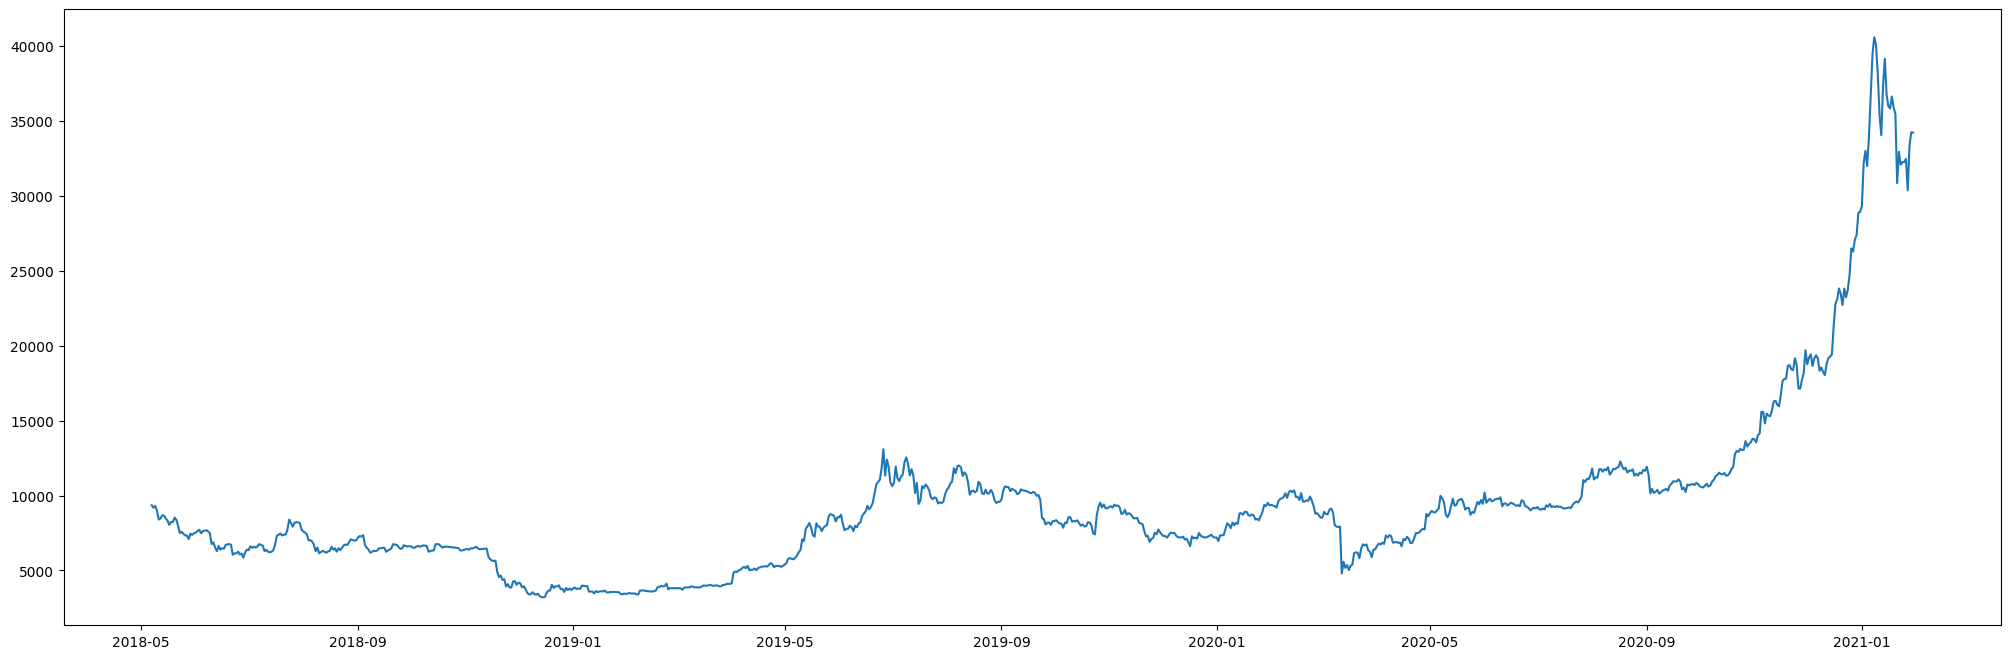

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
plt.plot(df['close_USD'])
plt.show()

In [6]:
df_p = df.reset_index()[["Time", "close_USD"]].rename(
    columns={"Time": "ds", "close_USD": "y"}
)

In [7]:
df_p

,ds,y
0,2018-05-07,9365.00
1,2018-05-08,9187.56
2,2018-05-09,9310.00
3,2018-05-10,9002.20
4,2018-05-11,8400.00
...,...,...
995,2021-01-26,32467.77
996,2021-01-27,30366.15
997,2021-01-28,33364.86
998,2021-01-29,34252.20


In [8]:
import pandas as pd
from prophet import Prophet

model = Prophet()

# Fit the model
model.fit(df_p)

# create date to predict
future_dates = model.make_future_dataframe(periods=365)

# Make predictions
predictions = model.predict(future_dates)

predictions.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkiywx_9e/z4blkmhl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkiywx_9e/t3zhr5n3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17391', 'data', 'file=/tmp/tmpkiywx_9e/z4blkmhl.json', 'init=/tmp/tmpkiywx_9e/t3zhr5n3.json', 'output', 'file=/tmp/tmpkiywx_9e/prophet_modelroupk8fb/prophet_model-20230911194326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-07,2870.377510,5987.820676,8609.255584,2870.377510,2870.377510,4423.193002,4423.193002,4423.193002,9.209057,9.209057,9.209057,4413.983945,4413.983945,4413.983945,0.0,0.0,0.0,7293.570512
1,2018-05-08,2888.121785,5988.706725,8606.707956,2888.121785,2888.121785,4470.179806,4470.179806,4470.179806,-18.251420,-18.251420,-18.251420,4488.431227,4488.431227,4488.431227,0.0,0.0,0.0,7358.301591
2,2018-05-09,2905.866060,6103.525964,8843.707464,2905.866060,2905.866060,4581.427841,4581.427841,4581.427841,24.461161,24.461161,24.461161,4556.966680,4556.966680,4556.966680,0.0,0.0,0.0,7487.293901
3,2018-05-10,2923.610336,6198.949435,8811.430200,2923.610336,2923.610336,4607.574845,4607.574845,4607.574845,-11.063767,-11.063767,-11.063767,4618.638612,4618.638612,4618.638612,0.0,0.0,0.0,7531.185181
4,2018-05-11,2941.354611,6400.276166,8995.179633,2941.354611,2941.354611,4678.023203,4678.023203,4678.023203,5.414738,5.414738,5.414738,4672.608465,4672.608465,4672.608465,0.0,0.0,0.0,7619.377813


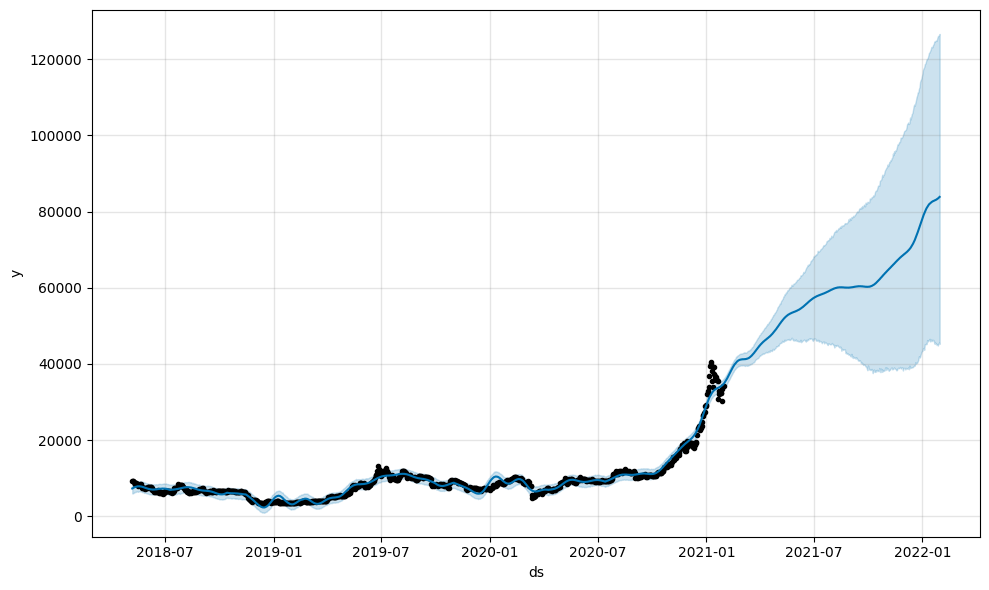

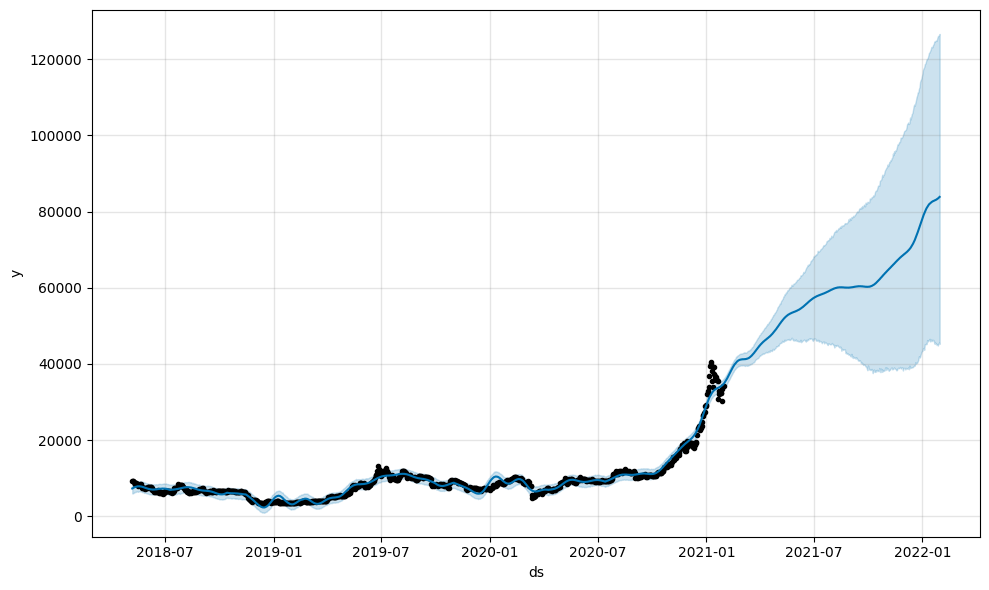

In [11]:
model.plot(predictions)

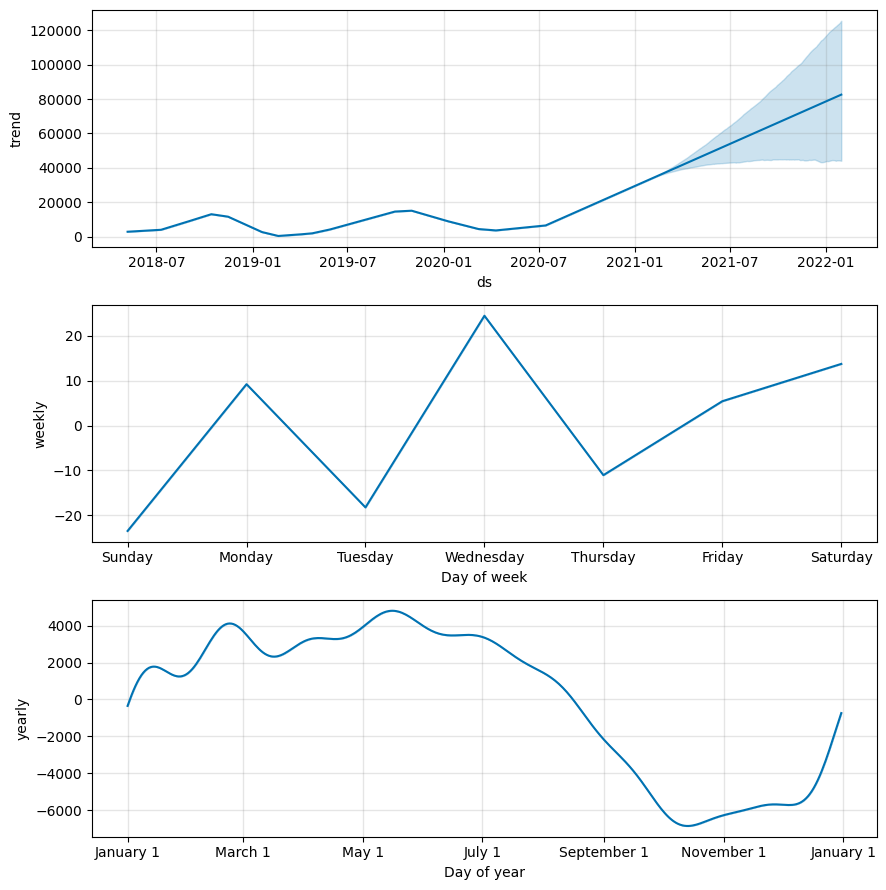

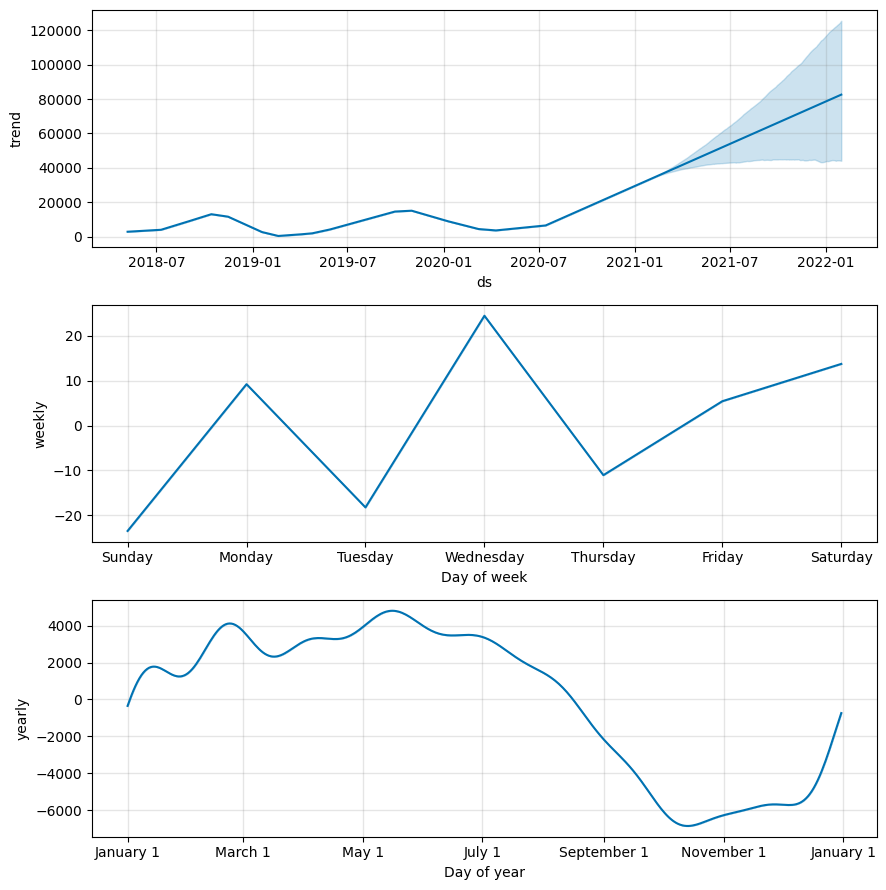

In [10]:
model.plot_components(predictions)